# **HEART FAILURE CLASSIFICATION**
This project uses a dataset named heart.csv which has 12 attributes based on which the training for classification is made.The total number of records found in this file is 918 with no duplicates.

# Import the required Libraries

The path mentioned was based on the kaggle folder and location.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


# Reading the Dataset
The data set consists of 12 columns including the HeartDisease which is what needs to be predicted.

In [2]:
df = pd.read_csv("../input/heart-failure-prediction/heart.csv")
df.head()
# df['ChestPainType'].unique()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Data Visualization

Text(0.5, 1.0, 'Correlation Map')

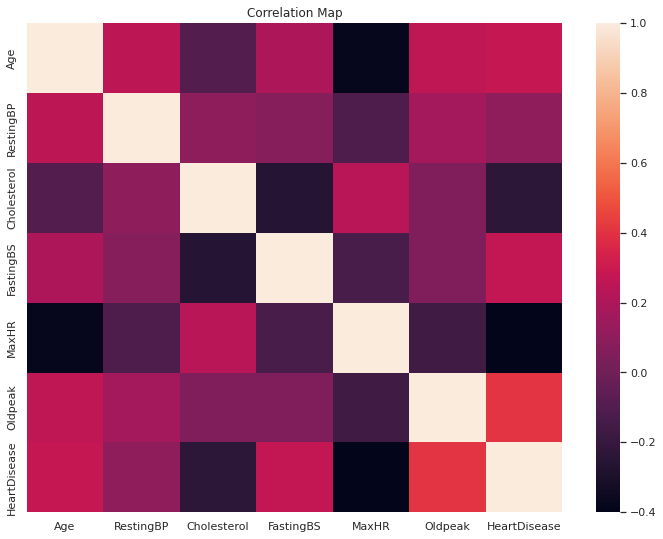

In [6]:
sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(df.corr()).set_title("Correlation Map")

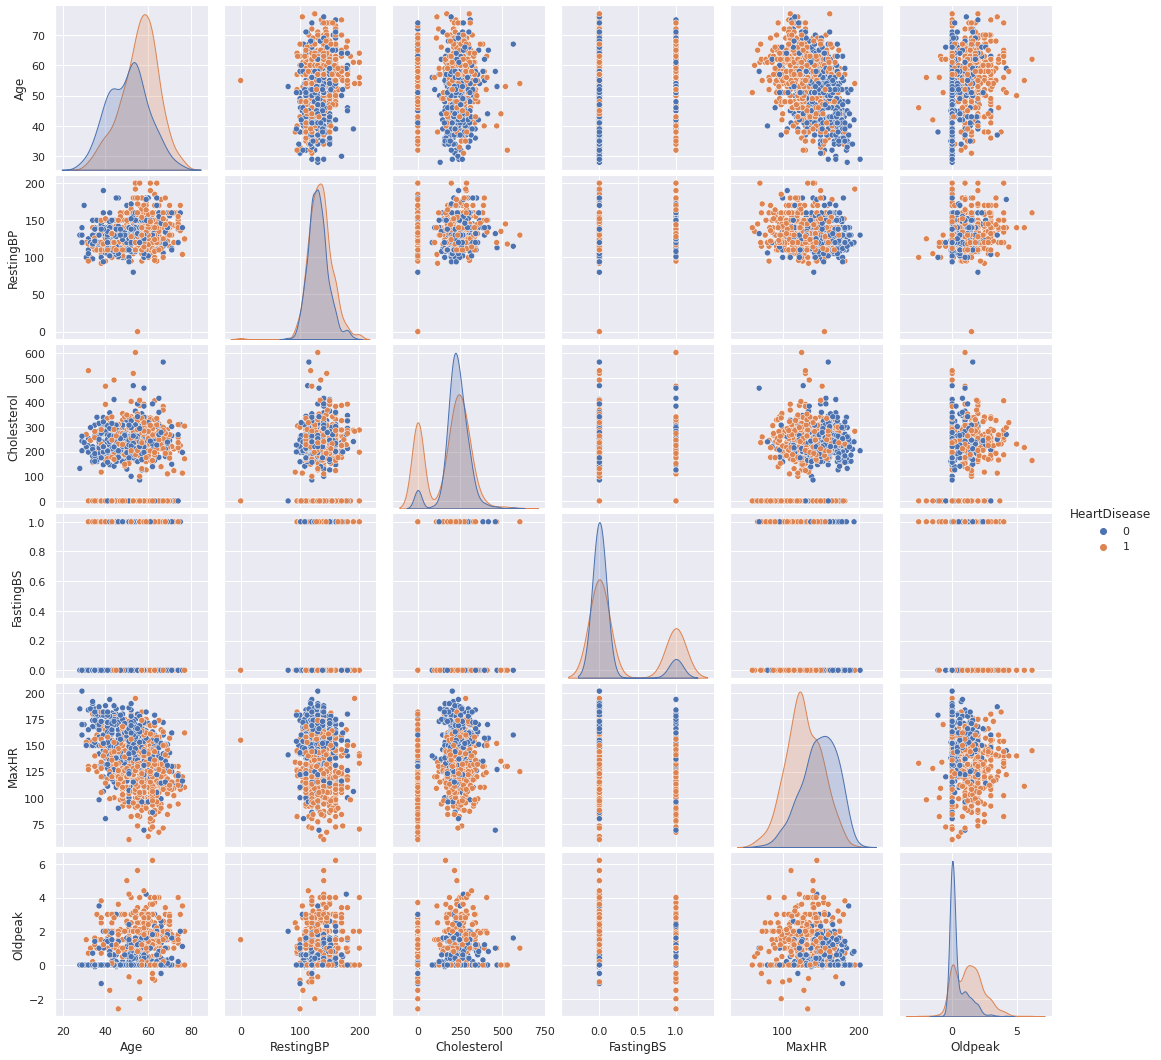

In [7]:
sns.pairplot(df,hue="HeartDisease")

<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

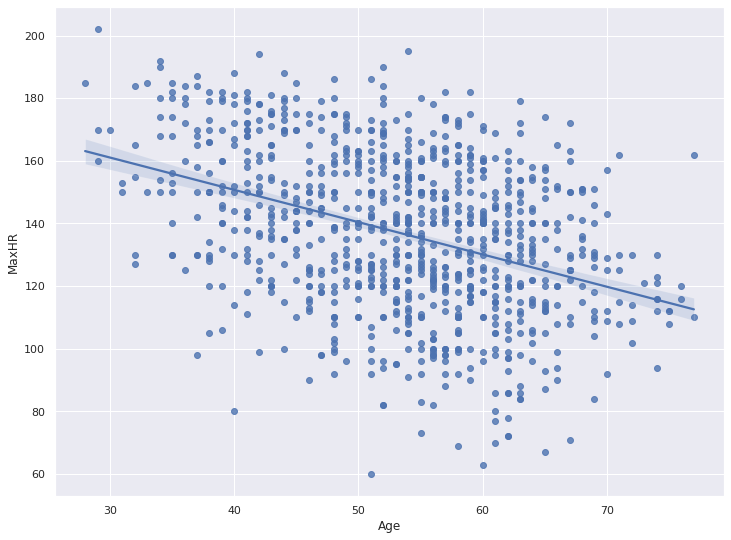

In [8]:
sns.regplot(x=df["Age"], y=df["MaxHR"])

# 1. Gender Plot

In [9]:
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [10]:
pd.crosstab(df["Sex"], df['HeartDisease'])

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


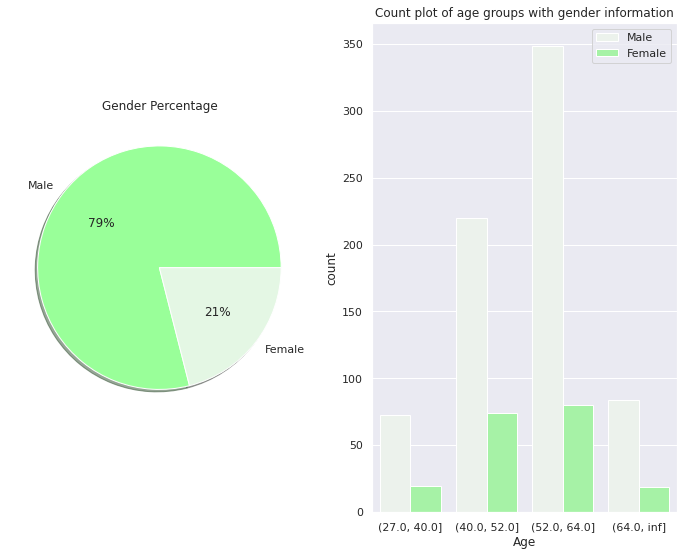

In [11]:
# Pie chart for different classes 
age_groups = pd.cut(df['Age'], bins=[27, 40, 52, 64, np.inf])
plt.subplot(1,2,1)
classes = ['Male', 'Female']
plt.pie(df["Sex"].value_counts(), labels = classes, autopct='%.0f%%', shadow=True, colors = ['#99ff99','#e4f7e4'])
plt.title("Gender Percentage")

# Count plot of ratings based on gender
plt.subplot(1,2,2)
classes = ['Male', 'Female']
sns.countplot(x=age_groups, data=df, hue="Sex", color="#99ff99")
plt.title("Count plot of age groups with gender information")
plt.legend(classes)

plt.show()


# 2. Age Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



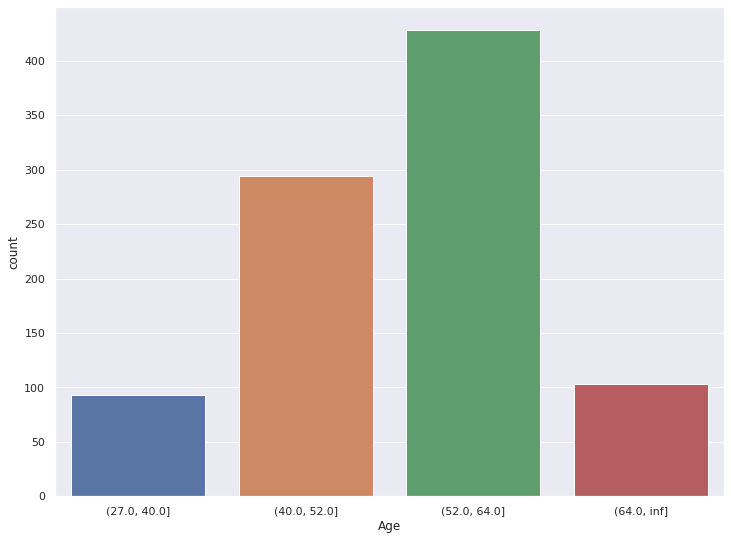

In [12]:
# age_groups = pd.cut(df['Age'], bins=4)

age_groups.value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(age_groups)
plt.show()

In [13]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

**Gender Count in each Age Group**

In [14]:
pd.crosstab(age_groups, df['Sex'])

Sex,F,M
Age,,
"(27.0, 40.0]",20,73
"(40.0, 52.0]",74,220
"(52.0, 64.0]",80,348
"(64.0, inf]",19,84


In [15]:
pd.crosstab(age_groups, df['HeartDisease'])

HeartDisease,0,1
Age,,
"(27.0, 40.0]",61,32
"(40.0, 52.0]",167,127
"(52.0, 64.0]",151,277
"(64.0, inf]",31,72


# 3. CheckPainType Plot

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


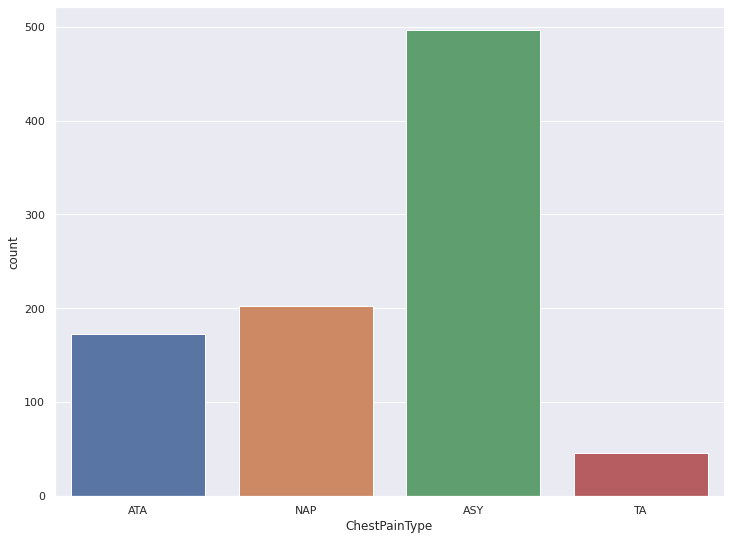

In [16]:
print(df["ChestPainType"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="ChestPainType")
plt.show()

In [17]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [18]:
pd.crosstab(df["ChestPainType"], age_groups)

Age,"(27.0, 40.0]","(40.0, 52.0]","(52.0, 64.0]","(64.0, inf]"
ChestPainType,,,,
ASY,33,147,254,62
ATA,29,68,71,5
NAP,24,69,83,27
TA,7,10,20,9


In [19]:
pd.crosstab(df["ChestPainType"], df['Sex'])

Sex,F,M
ChestPainType,,
ASY,70,426
ATA,60,113
NAP,53,150
TA,10,36


In [20]:
pd.crosstab(df["ChestPainType"], df['HeartDisease'])

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


# 4. ExerciseAngina Plot

N    547
Y    371
Name: ExerciseAngina, dtype: int64


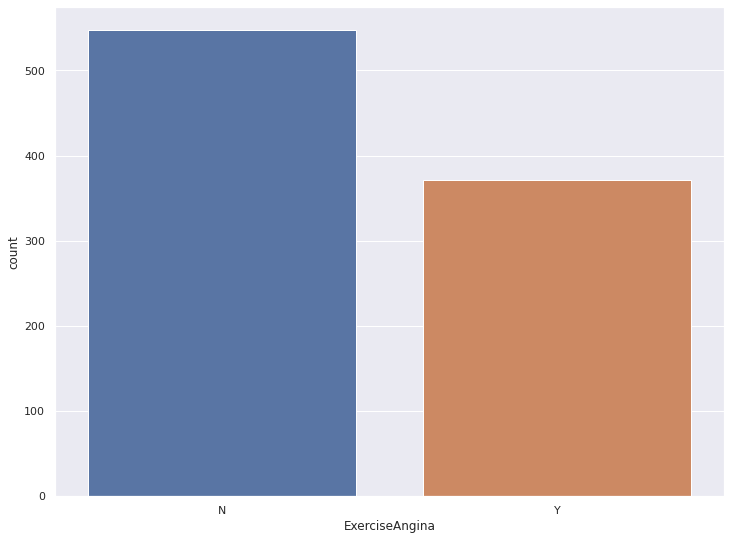

In [21]:
print(df["ExerciseAngina"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="ExerciseAngina")
plt.show()

In [22]:
pd.crosstab(df["ExerciseAngina"], df['Sex'])

Sex,F,M
ExerciseAngina,,
N,150,397
Y,43,328


In [23]:
pd.crosstab(df["ExerciseAngina"], df['HeartDisease'])

HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


# 5. RestingECG Plot

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


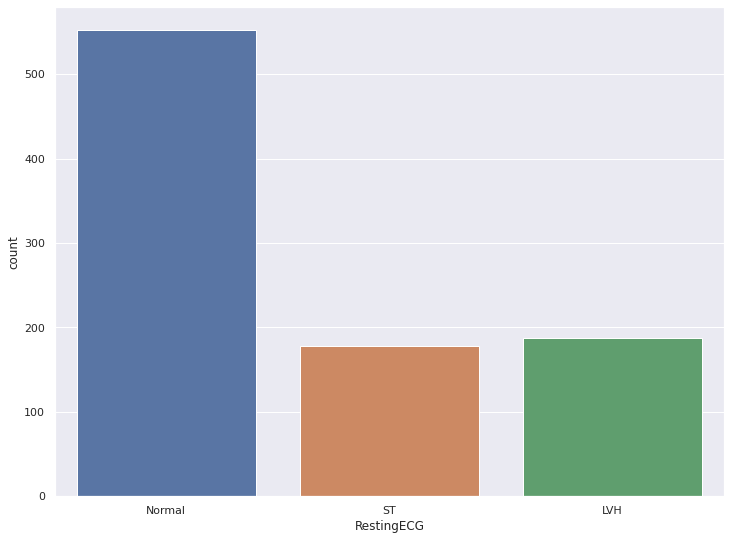

In [24]:
print(df["RestingECG"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="RestingECG")
plt.show()

In [25]:
pd.crosstab(df["RestingECG"], age_groups)

Age,"(27.0, 40.0]","(40.0, 52.0]","(52.0, 64.0]","(64.0, inf]"
RestingECG,,,,
LVH,8,44,104,32
Normal,75,212,218,47
ST,10,38,106,24


In [26]:
pd.crosstab(df["RestingECG"], df['Sex'])

Sex,F,M
RestingECG,,
LVH,47,141
Normal,118,434
ST,28,150


In [27]:
pd.crosstab(df["RestingECG"], df['HeartDisease'])

HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


# 6. ST_Slope Plot


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


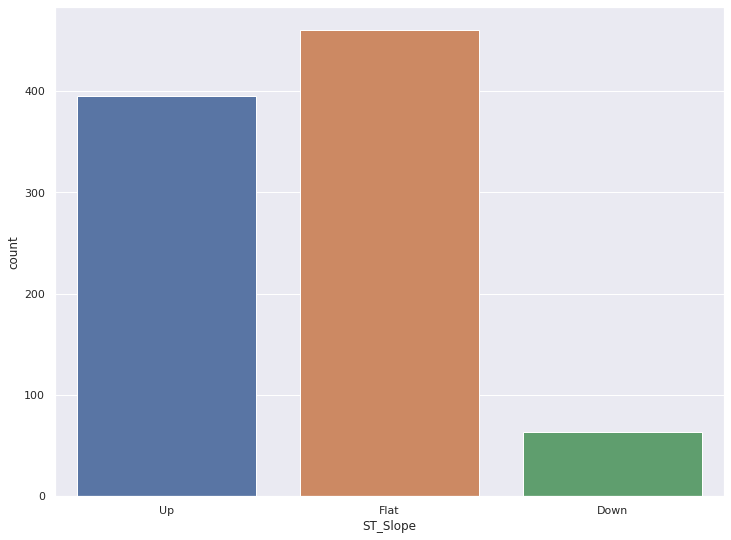

In [28]:
print(df["ST_Slope"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="ST_Slope")
plt.show()

In [29]:
pd.crosstab(df["ST_Slope"], age_groups)

Age,"(27.0, 40.0]","(40.0, 52.0]","(52.0, 64.0]","(64.0, inf]"
ST_Slope,,,,
Down,2,9,42,10
Flat,29,128,240,63
Up,62,157,146,30


In [30]:
pd.crosstab(df["ST_Slope"], df['Sex'])

Sex,F,M
ST_Slope,,
Down,7,56
Flat,75,385
Up,111,284


In [31]:
pd.crosstab(df["ST_Slope"], df['HeartDisease'])

HeartDisease,0,1
ST_Slope,,
Down,14,49
Flat,79,381
Up,317,78


# Data Cleaning and Manipulation
> The data is checked for null values. Since there is no null entries in this dataset no cleaning was done.
The String or Object type Columns are converted to integer values using LabelEncoder for each category
Below are the columns which were converted.

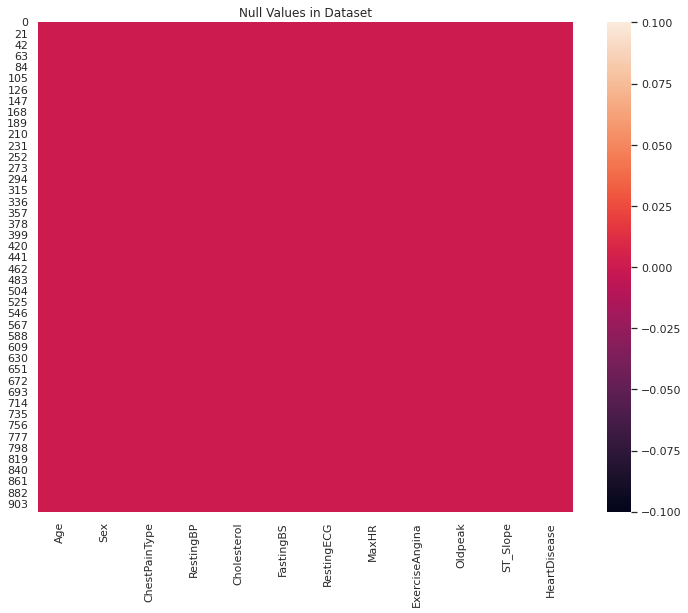

In [32]:
sns.heatmap(df.isnull()).set_title("Null Values in Dataset")

plt.show()

# One-Hot Encoding trial

In [33]:
# from sklearn.preprocessing import OneHotEncoder
# ins_enc = OneHotEncoder(handle_unknown='ignore')
# ins_enc_df = pd.DataFrame(ins_enc.fit_transform(df[['Sex']]).toarray())

In [34]:
# ins_enc_df.head()
# df_ohe = pd.merge(left=df, right=ins_enc_df, left_index=True, right_index=True)
# # df_ohe.info()
# df_ohe.rename(columns={"0":"Male", "1":"Female"})
# df_ohe.head()

In [35]:
# sns.heatmap(df_ohe.corr())

# Label Encoding

Using Label Encoder the following fields are categorized.
* **Sex:**
        Female - 0
        Male   - 1
* **ChestPainType:**
        ASY - 0
        ATA - 1
        NAP - 2
        TA  - 3    
* **ExerciseAngina:** 
        N - 0
        Y - 1    
* **RestingECG:**  
        LVH    - 0
        Normal - 1
        ST     - 2    
* **ST_Slope:**
        Up - 2
        Flat - 1
        Down - 0

In [36]:
from sklearn.preprocessing import LabelEncoder
# gender_type = ('M', 'F')
# gender_df = pd.DataFrame(gender_type, columns=['Sex'])
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['ExerciseAngina'] = label_enc.fit_transform(df['ExerciseAngina'])
df['ChestPainType'] = label_enc.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_enc.fit_transform(df['RestingECG'])
df['ST_Slope'] = label_enc.fit_transform(df['ST_Slope'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [37]:
# df['ChestPainType'].unique()

In [38]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


Text(0.5, 1.0, 'Correlation Map')

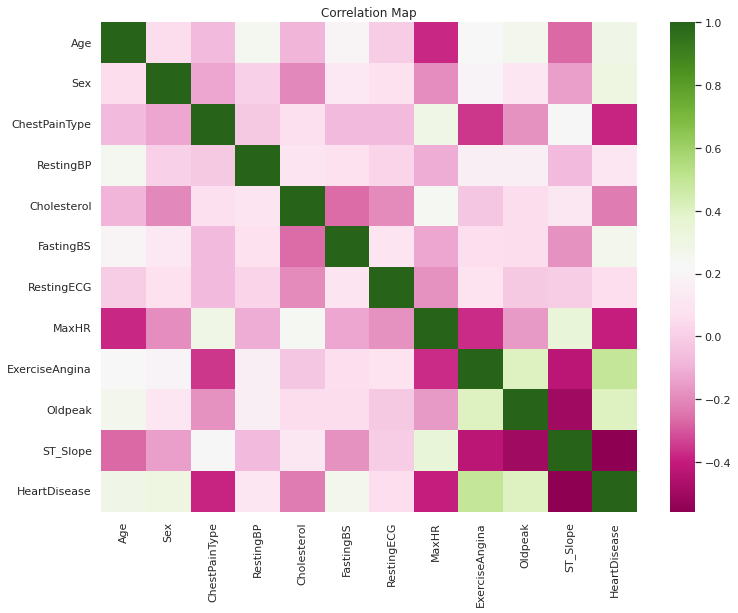

In [39]:
sns.heatmap(df.corr(), cmap = "PiYG").set_title("Correlation Map")

# Model Training with just one Feature - Age

***Trying to understand how Logistic Regression works with just one feature which is selected in to be Age.***

In [40]:
from sklearn.model_selection import train_test_split
train_df1 = df[['Age']]
X1 = train_df1.values
y1 = df['HeartDisease'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)
# print(X3)

In [41]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
#data_fit.score(X, y)
# print(X_train2.shape)
log_model.fit(X_train1, y_train1)
print("model score: %.3f" % log_model.score(X_test1, y_test1))

model score: 0.598


# Model Training Using just 2 columns - Age and Sex

Trying out Logistic regression and checking the accuracy using 2 random features

In [42]:
train_df2 = df[['Age', 'Sex']]
X2 = train_df2.values
y2 = df['HeartDisease'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)
# print(X3)

In [43]:
log_model.fit(X_train2, y_train2)
print("model score: %.3f" % log_model.score(X_test2, y_test2))

model score: 0.658


# Model Training - All features

In [44]:
train_df3 = df
data3 = train_df3.values
X3 = train_df3.drop(columns = ['HeartDisease']).values
y3 = train_df3['HeartDisease'].values
# y = data1[:, -1]
# print(y)

In [45]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42)
log_model.fit(X_train3, y_train3)
print("model score: %.3f" % log_model.score(X_test3, y_test3))

model score: 0.842


# Model Training without Resting ECG and Resting BP

***Since the correlation is very less in the RestingECG and RestingBP with HeartDisease, these columns are dropped and then training is done.***

In [46]:
train_df4 = df
X4 = train_df4.drop(columns = ['RestingBP', 'RestingECG', 'HeartDisease']).values
y4 = train_df4['HeartDisease'].values
print(X4)

[[40.   1.   1.  ...  0.   0.   2. ]
 [49.   0.   2.  ...  0.   1.   1. ]
 [37.   1.   1.  ...  0.   0.   2. ]
 ...
 [57.   1.   0.  ...  1.   1.2  1. ]
 [57.   0.   1.  ...  0.   0.   1. ]
 [38.   1.   2.  ...  0.   0.   2. ]]


In [47]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.20, random_state=42)
# print(X_train2.shape)
log_model.fit(X_train4, y_train4)
print("model score: %.3f" % log_model.score(X_test4, y_test4))

model score: 0.842


In [48]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, random_state=1)
print(X.shape, y.shape)

(1000, 2) (1000,)


In [49]:
from collections import Counter
counter = Counter(y4)
print(counter)

Counter({1: 508, 0: 410})


In [50]:
for i in range(10):
    print(X4[i], y4[i])

[ 40.   1.   1. 289.   0. 172.   0.   0.   2.] 0
[ 49.   0.   2. 180.   0. 156.   0.   1.   1.] 1
[ 37.   1.   1. 283.   0.  98.   0.   0.   2.] 0
[ 48.    0.    0.  214.    0.  108.    1.    1.5   1. ] 1
[ 54.   1.   2. 195.   0. 122.   0.   0.   2.] 0
[ 39.   1.   2. 339.   0. 170.   0.   0.   2.] 0
[ 45.   0.   1. 237.   0. 170.   0.   0.   2.] 0
[ 54.   1.   1. 208.   0. 142.   0.   0.   2.] 0
[ 37.    1.    0.  207.    0.  130.    1.    1.5   1. ] 1
[ 48.   0.   1. 284.   0. 120.   0.   0.   2.] 0


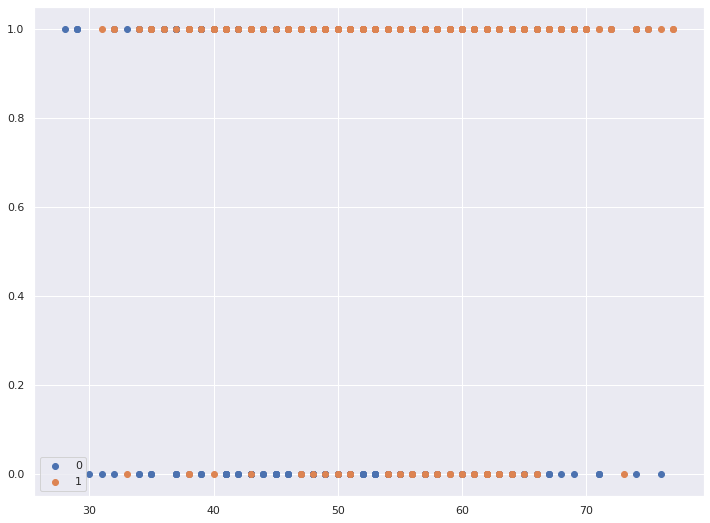

In [51]:
from matplotlib import pyplot
from numpy import where
for label, _ in counter.items():
	row_ix = where(y4 == label)[0]
	pyplot.scatter(X4[row_ix, 0], X4[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Multiple Model Trainings

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [54]:
# df_copy = df.drop(columns = ['RestingBP', 'RestingECG', 'HeartDisease']).values
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 0)

In [56]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
lgr= ['Logistic Regression', LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)]
svm = ['SVM', SVC(random_state = 0)]
gaus= ['GaussianNB', GaussianNB()]
bern=['BernoulliNB', BernoulliNB()]
dectree=['Decision Tree', DecisionTreeClassifier(random_state=0)]
randF=['Random Forest', RandomForestClassifier(random_state=45)]
xgb=['XGBoost', XGBClassifier(eval_metric= 'error', use_label_encoder=False)]

In [58]:
models = []
models.append(lgr)
models.append(svm)
models.append(xgb)
models.append(randF)
models.append(dectree)

In [59]:
print(len(models))

5


In [60]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Sc
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
[[60 17]
 [13 94]]
Accuracy Score:  0.8369565217391305

K-Fold Validation Mean Accuracy: 85.02 %

Standard Deviation: 3.98 %

ROC AUC Score: 0.83

Precision: 0.85

Recall: 0.88

F1: 0.86
-----------------------------------

SVM :
[[62 15]
 [ 9 98]]
Accuracy Score:  0.8695652173913043

K-Fold Validation Mean Accuracy: 87.74 %

Standard Deviation: 4.13 %

ROC AUC Score: 0.86

Precision: 0.87

Recall: 0.92

F1: 0.89
-----------------------------------

XGBoost :
[[60 17]
 [14 93]]
Accuracy Score:  0.8315217391304348

K-Fold Validation Mean Accuracy: 86.11 %

Standard Deviation: 3.20 %

ROC AUC Score: 0.82

Precision: 0.85

Recall: 0.87

F1: 0.86
-----------------------------------

Random Forest :
[[63 14]
 [ 9 98]]
Accuracy Score:  0.875

K-Fold Validation Mean Accuracy: 87.06 %

Standard Deviation: 4.18 %

ROC AUC Score: 0.87

Precision: 0.88

Recall: 0.92

F1: 0.89
-----------------------------------

Decision Tree :
[[62 15]
 [25 82]]
Accuracy Score:  0.782608695

In [61]:
df_model = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [62]:
df_model.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df_model

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
3,Random Forest,87.500000,87.060348,4.177143,0.867035,0.875000,0.915888,0.894977
1,SVM,86.956522,87.743428,4.132726,0.860541,0.867257,0.915888,0.890909
0,Logistic Regression,83.695652,85.020363,3.984506,0.828863,0.846847,0.878505,0.862385
2,XGBoost,83.152174,86.105146,3.198837,0.824190,0.845455,0.869159,0.857143
4,Decision Tree,78.260870,79.835246,3.508398,0.785775,0.845361,0.766355,0.803922
